In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data downloaded from the Pew Research Center website
pewdata = pd.read_spss('US Teens and their parents - 2019 Pew Research Survey - FOR RELEASE.sav')

In [13]:
df1 = pewdata.loc[pewdata['PTEENIMP']!='Refused']
df1 = df1.loc[df1['TRELIMP']!='Refused']
df1 = df1.loc[df1['PRELIMP']!='Refused']
df1 = df1.loc[df1['TPARIMP']!='Refused']
df1 = df1.reset_index()

Two of the columns feature the parent and teen guessing the importance of religion to their respective parent or teen. Two other columns are the answers given by the parent or teen in question on the importance of religion in their lives. I wanted to find out which group (parent or teen) was able to more correctly guess the other group's answers.

In [14]:
# Make two empty columns for the correct or incorrect guess and input a value based on whether the answers to religious
# importance and guessed religious importance were the same or not
df1['teen_guess'] = ''
df1['parent_guess'] = ''
for x in range(len(df1)):
    if df1.loc[x, 'PTEENIMP'] == df1.loc[x, 'TRELIMP']:
        df1.loc[x, 'parent_guess'] = 'correct'
    else:
        df1.loc[x, 'parent_guess'] = 'incorrect'

In [15]:
for x in range(len(df1)):
    if df1.loc[x, 'PRELIMP'] == df1.loc[x, 'TPARIMP']:
        df1.loc[x, 'teen_guess'] = 'correct'
    else:
        df1.loc[x, 'teen_guess'] = 'incorrect'

In [16]:
df1['parent_guess'].value_counts(normalize = True)

correct      0.610862
incorrect    0.389138
Name: parent_guess, dtype: float64

In [17]:
df1['teen_guess'].value_counts(normalize=True)

correct      0.698208
incorrect    0.301792
Name: teen_guess, dtype: float64

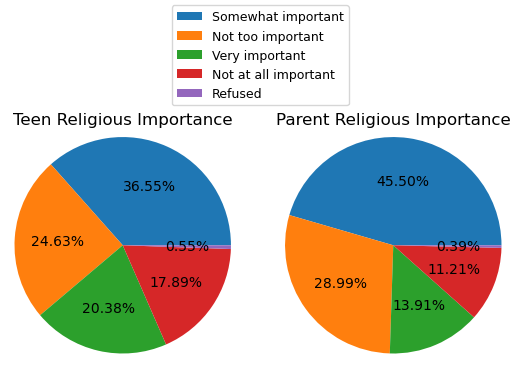

In [7]:
# Two pie charts showcasing the answers for teen religious importance vs parent religious importance
fig, axes = plt.subplots(nrows = 1, ncols = 2)
tgraph = pewdata[['TRELIMP']].value_counts().plot.pie(autopct='%1.2f%%', title = 'Teen Religious Importance', labeldistance=None,
                                            ylabel='', radius=1.2, ax = axes[0])
pgraph = pewdata[['PRELIMP']].value_counts().plot.pie(autopct='%1.2f%%', title = 'Parent Religious Importance', labeldistance=None,
                                            ylabel='', radius=1.2, ax = axes[1])
fig.legend(labels = pewdata['TRELIMP'].unique(), prop={'size':9}, loc='upper center')

In [8]:
# Creating a new column that states whether or not a parent and their respective teen follow the same religion
pewdata['same_religion'] = ''
for x in range(len(pewdata)):
    if pewdata.loc[x, 'Preltrad'] == pewdata.loc[x, 'treltrad']:
        pewdata.loc[x, 'same_religion'] = 'Yes'
    else:
        pewdata.loc[x, 'same_religion'] = 'No'

In [9]:
# A dataframe showcasing each religion and the same religion value counts, as well as the percentage of those who chose the
# same religion
df = pewdata.groupby('Preltrad')['same_religion'].value_counts().unstack()
df['percent_same'] = round((df['Yes']/(df['No']+df['Yes']))*100, 2)
df.sort_values('percent_same', ascending=False)

same_religion,No,Yes,percent_same
Preltrad,,,
Mormon,2,49,96.08
Hindu,1,10,90.91
Jewish,2,19,90.48
Buddhist,1,7,87.50
Muslim,2,12,85.71
Unaffiliated,60,344,85.15
Theologically Evangelical Protestant Churches,88,353,80.05
Catholic,100,398,79.92
Jehovah's Witness,2,7,77.78


In [10]:
# The top 5 largest groups of those parent and teen pairs who did not chose the same religion grouped by parent and teen
# relgion choice
not_same = pewdata[pewdata['same_religion']=='No']
not_same.groupby(['Preltrad', 'treltrad']).size().nlargest(5)

Preltrad                                       treltrad                                     
Catholic                                       Unaffiliated                                     79
Historic Mainline Protestant Churches          Unaffiliated                                     61
Theologically Evangelical Protestant Churches  Unaffiliated                                     47
                                               Historic Mainline Protestant Churches            29
Historic Mainline Protestant Churches          Theologically Evangelical Protestant Churches    27
dtype: int64

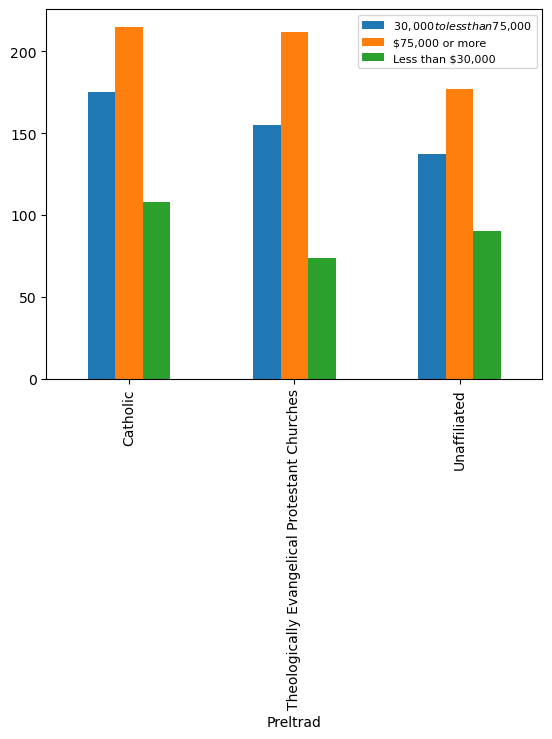

In [11]:
# Taking the top 3 parent religions in terms of size, and creating a bar graph showing the size of the income levels 
# of each one
top3 = pewdata.groupby('Preltrad').size().sort_values(ascending=False).index[:3]
top3df = pewdata[pewdata['Preltrad'].isin(top3)]
top3df = top3df.groupby('Preltrad')['PPINCIMPREC'].value_counts().nlargest(9).unstack()
ax = top3df.plot.bar()
plt.legend(prop={'size':8})

In [20]:
df2 = pewdata[pewdata['Preltrad'].isin(['Theologically Evangelical Protestant Churches', 'Historic Mainline Protestant Churches'
                                       , 'Catholic', 'Unaffiliated'])]
df2 = df2[df2['treltrad'].isin(['Theologically Evangelical Protestant Churches', 'Historic Mainline Protestant Churches',
                               'Catholic', 'Unaffiliated'])]

In [23]:
df3 = pd.crosstab(df2.Preltrad, df2.treltrad, normalize = 'index').round(2)

In [25]:
df3 = df3.reindex(['Theologically Evangelical Protestant Churches', 'Historic Mainline Protestant Churches', 'Catholic', 'Unaffiliated'])

In [26]:
df3 = df3[['Theologically Evangelical Protestant Churches', 'Historic Mainline Protestant Churches', 'Catholic', 'Unaffiliated']]

In [31]:
df3.index.names = ['Parent']
df3.columns.names = ['Teen']
df3

Teen,Theologically Evangelical Protestant Churches,Historic Mainline Protestant Churches,Catholic,Unaffiliated
Parent,,,,
Theologically Evangelical Protestant Churches,0.82,0.07,0.01,0.11
Historic Mainline Protestant Churches,0.11,0.61,0.02,0.26
Catholic,0.01,0.02,0.81,0.16
Unaffiliated,0.02,0.05,0.05,0.88
